In [11]:
import tensorflow as tf
from tensorflow.keras import Model, Input, Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
import os
from evaluate_model import evaluate_model, get_data, plot_accuracy, plot_loss
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [2]:
shape, classes, data = get_data()
train_data, val_data, test_data = data

Found 2392 files belonging to 2 classes.
Using 1914 files for training.
Found 2392 files belonging to 2 classes.
Using 478 files for validation.
Found 597 files belonging to 2 classes.


In [4]:
inputs = Input(shape=shape)
pre_trained_vgg_model = tf.keras.applications.VGG19(include_top=False, weights='imagenet', classifier_activation=None, classes=len(classes))

for layer in pre_trained_vgg_model.layers:
    layer.trainable = False
    layer1 = pre_trained_vgg_model(inputs)
    layer2 = Flatten()(layer1)
    layer3 = Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(layer2)
    outputs = Dense(len(classes), activation='softmax')(layer3)
    vgg_model = Model(inputs=inputs, outputs=outputs)

vgg_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
vgg_model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 flatten_21 (Flatten)        (None, 12800)             0         
                                                                 
 dense_42 (Dense)            (None, 32)                409632    
                                                                 
 dense_43 (Dense)            (None, 2)                 66        
                                                                 
Total params: 20434082 (77.95 MB)
Trainable params: 409698 (1.56 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [6]:
vgg_model_hist = vgg_model.fit(
  train_data,
  validation_data=val_data,
  epochs=5
)

Epoch 1/5
60/60 [==============================] - 163s 3s/step - loss: 1.3656 - accuracy: 0.8203 - val_loss: 0.5804 - val_accuracy: 0.9017
Epoch 2/5
60/60 [==============================] - 181s 3s/step - loss: 0.4232 - accuracy: 0.9624 - val_loss: 0.3563 - val_accuracy: 0.9644
Epoch 3/5
60/60 [==============================] - 184s 3s/step - loss: 0.3050 - accuracy: 0.9828 - val_loss: 0.2999 - val_accuracy: 0.9854
Epoch 4/5
60/60 [==============================] - 186s 3s/step - loss: 0.2838 - accuracy: 0.9843 - val_loss: 0.3127 - val_accuracy: 0.9874
Epoch 5/5
60/60 [==============================] - 187s 3s/step - loss: 0.2566 - accuracy: 0.9812 - val_loss: 0.3054 - val_accuracy: 0.9728


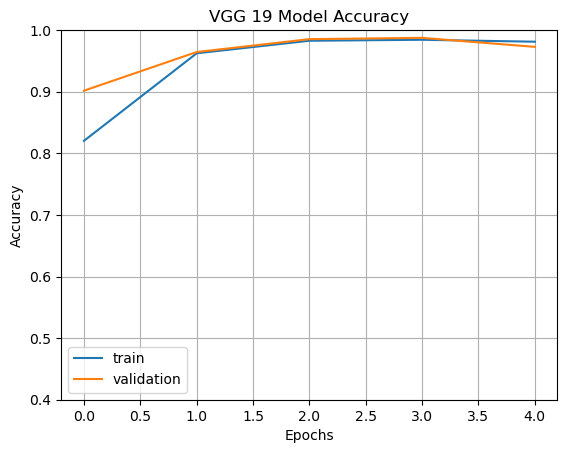

In [7]:
plot_accuracy(vgg_model_hist, "VGG 19 Model")

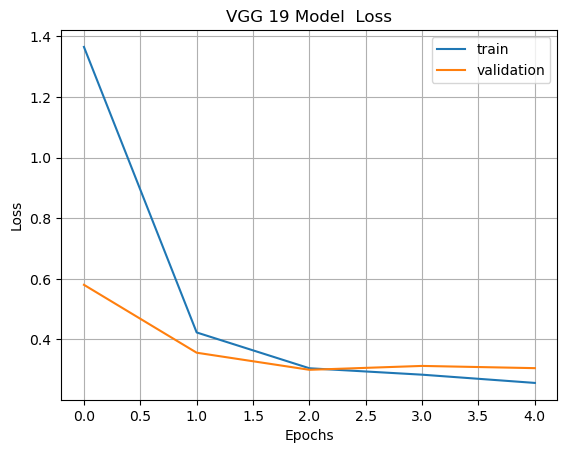

In [8]:
plot_loss(vgg_model_hist, "VGG 19 Model")

1/1 [==============================] - 2s 2s/step


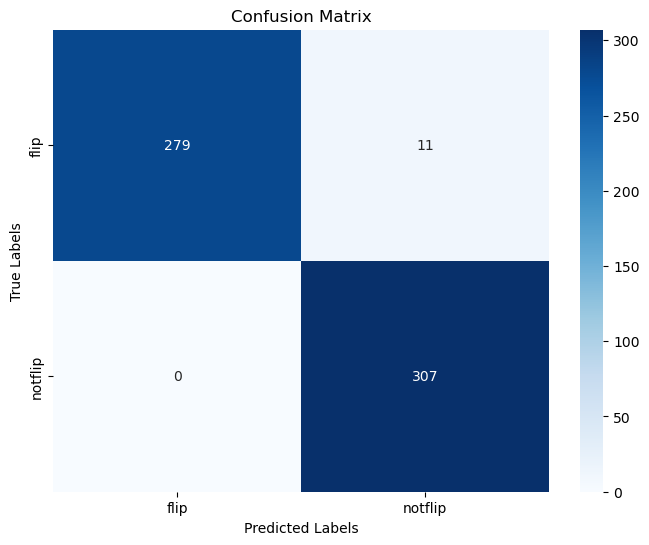

{'accuracy': 0.981574539363484, 'f1_score': 0.9824}

In [9]:
evaluate_model(vgg_model, test_data)

In [10]:
vgg_model_path = '../models/vgg_model.h5'
vgg_model.save(vgg_model_path)
vgg_model_size = os.path.getsize(vgg_model_path) / (1024 * 1024)
print('Model size: ', vgg_model_size, 'MB')

Model size:  81.15352630615234 MB
